<center>
    
# Taller Numérico

### Juan Sebastian Sierra Jaraba - jsierraj@unal.edu.co 
### Departamento de Física, Facultad de Ciencias, Sede Bogotá
### Universidad Nacional de Colombia
    
</center>

$$H = \frac{\vec{p}²}{2m_{red}} - \frac{\lambda\hbar c}{r} + E_a + \gamma\frac{1}{r²} + \xi \frac{1}{r³} \vec{l}\cdot\vec{s}$$ 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
m1c2, m2c2 = 1000, 200

m_rc2 = m1c2*m2c2/(m1c2+m2c2)
Ea = 250
lda = 1.8
gma = 40
xi = 20
hc = 197.33

In [22]:
def E(n, j, l): 
    E_0 = -0.5*m_rc2*lda*lda/n**2 + Ea
    E_1 = gma*((lda*m_rc2/hc)**2)/(n**3*(l+0.5))
    E_2 = 0.5*xi*((lda*m_rc2/hc)**3)*(2*(j-l)*(l+0.5)-0.5)/(n**3*l*(l+0.5)*(l+1)) if l>0 else 0
    return E_0 + E_1 + E_2

In [23]:
print("Primeros autovalores de la energía \n\nE(n,  j,  l)\n")
for n in range(1,4):
    for l in range(n):
        if l>0: print("E(%d, %2.1f, %d) = %.2f MeV"%(n, l-0.5, l, E(n, l-0.5, l)))
        print("E(%d, %2.1f, %d) = %.2f MeV"%(n, l+0.5, l, E(n, l+0.5, l)))

Primeros autovalores de la energía 

E(n,  j,  l)

E(1, 0.5, 0) = 164.90 MeV
E(2, 0.5, 0) = 205.61 MeV
E(2, 0.5, 1) = 187.28 MeV
E(2, 1.5, 1) = 191.67 MeV
E(3, 0.5, 0) = 226.85 MeV
E(3, 0.5, 1) = 221.42 MeV
E(3, 1.5, 1) = 222.72 MeV
E(3, 1.5, 2) = 221.11 MeV
E(3, 2.5, 2) = 221.54 MeV


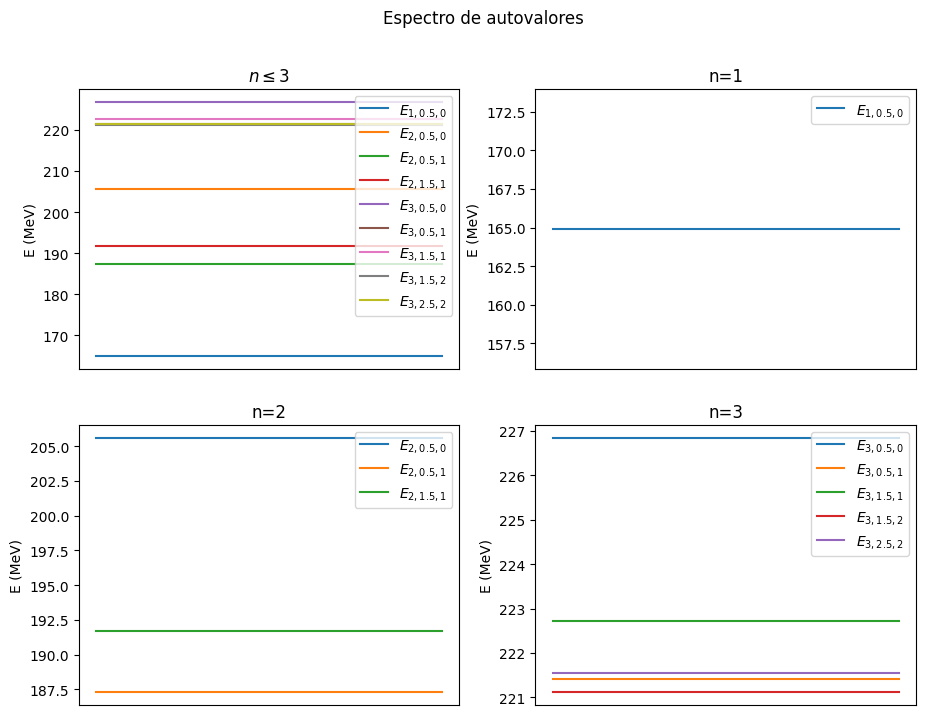

In [24]:
#Ploting

dl = np.linspace(0,1,2)

fig = plt.figure(figsize=(10.8, 8))
fig.suptitle("Espectro de autovalores")

ax1 = fig.add_subplot(2,2,1)
ax1.set_title(r"$n\leq3$")
plt.xticks([])

for n in range(1,4):
    ax2 = fig.add_subplot(2,2,n+1)
    ax2.set_title(r"n=%d"%(n))
    for l in range(n):
        if l>0: ax2.plot(dl, E(n, l-0.5, l)*np.ones(2), label=r"$E_{%d, %2.1f, %d}$"%(n, l-0.5, l))
        ax2.plot(dl, E(n, l+0.5, l)*np.ones(2), label=r"$E_{%d, %2.1f, %d}$"%(n, l+0.5, l))
        if l>0: ax1.plot(dl, E(n, l-0.5, l)*np.ones(2), label=r"$E_{%d, %2.1f, %d}$"%(n, l-0.5, l))
        ax1.plot(dl, E(n, l+0.5, l)*np.ones(2), label=r"$E_{%d, %2.1f, %d}$"%(n, l+0.5, l))
    ax2.legend(loc="upper right")
    ax2.set_ylabel(r"E (MeV)")
    plt.xticks([])


ax1.legend(loc="upper right")
ax1.set_ylabel(r"E (MeV)")

plt.show()